# Lección 3: Ajuste

### Ejercicios de pair programming 30 de enero.

In [14]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [15]:
# llamamos a nuestros datos estandarizados y codificados
df_est = pd.read_csv("datos/est_enc_airlines.csv", index_col = 0)
df_est.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0
2,1,1,1,-1.041667,1,0,-1.5,-1.5,-1.5,0.0,...,-0.666667,-1.0,-0.333333,0.0,1.0,0.0,-1.0,0.000000,0.000000,0.0
3,1,1,1,0.833333,1,0,-1.5,-1.5,-1.5,0.0,...,-1.000000,-3.0,-1.333333,-1.5,1.0,-1.5,-0.5,0.000000,0.000000,0.0
4,1,1,1,1.250000,1,0,-1.5,-1.5,-1.5,0.0,...,-0.666667,-2.0,-1.333333,-1.0,1.0,-1.0,0.5,0.000000,0.000000,0.0


In [16]:
# llamamos a nuestros datos sólo codificados
df_enc = pd.read_csv("datos/enc_airlines.csv", index_col = 0)
df_enc.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,65,1,0,0,0,0,2,...,3,3,0,3,5,3,2,0,0,0
1,1,0,1,47,1,2,0,0,0,3,...,3,4,4,4,2,3,2,310,305,0
2,1,1,1,15,1,0,0,0,0,3,...,2,3,3,4,4,4,2,0,0,0
3,1,1,1,60,1,0,0,0,0,3,...,1,1,0,1,4,1,3,0,0,0
4,1,1,1,70,1,0,0,0,0,3,...,2,2,0,2,4,2,5,0,0,0


### Realizamos un modelo con nuestros datos estandarizados y codificados.

In [17]:
# separamos los datos
X1 = df_est.drop("satisfaction", axis = 1)
y1 = df_est["satisfaction"]

In [18]:
# realizamos un train-test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [19]:
# definimos la regresión logística
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [20]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
21413,1,1,Train
7284,0,0,Train
86080,0,1,Train
59842,0,0,Train
69486,0,0,Train


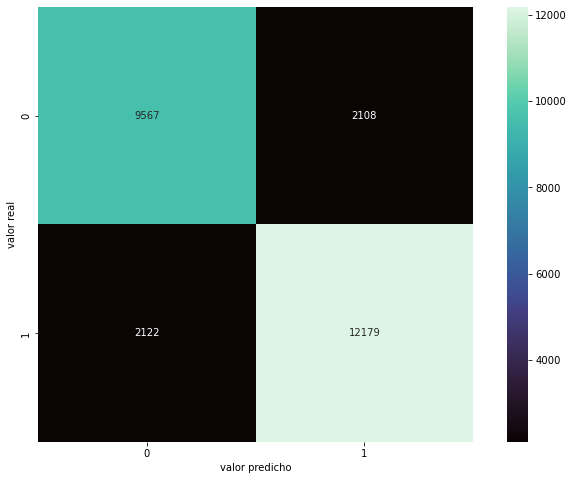

In [21]:
# creamos una matriz de confusión para comprobar la fiabilidad de nuestro modelo
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "mako")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

En este modelo, vemos que la fiabilidad es bastante alta. Se ha logrado capturar 12179 satisfactorios que lo son en realidad y 9567 insatisfechos que estan insatisfechos de verdad. 

Hemos conseguido 2122 personas que están satisfechas pero nuestro modelo dice que no y en contra 2108 personas que están insatisfechas pero nuestro modelo ha dicho que están satisfechas.

En nuestro caso nos interesa que los falsos positivos capturados sean del mínimo posible.

### Realizamos un modelo con nuestros datos sólo codificados.

In [22]:
# separamos los datos
X2 = df_enc.drop("satisfaction", axis = 1)
y2 = df_enc["satisfaction"]

In [23]:
# realizamos un train-test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [24]:
# definimos la regresión logística
log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

In [25]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head()

,Real,Predicted,Set
21413,1,1,Train
7284,0,1,Train
86080,0,1,Train
59842,0,1,Train
69486,0,1,Train


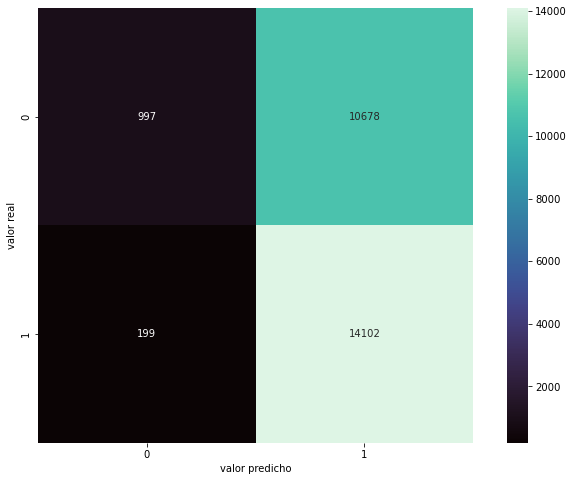

In [26]:
# creamos una matriz de confusión para comprobar la fiabilidad de nuestro modelo
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "mako")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

En este modelo, vemos que la fiabilidad es muy baja. Ya que los falsos positivos son muy altos, nos da mucha gente insatisfecha cuando en realidad están satisfechos.

En nuestro caso, el modelo dónde usamos los datos codificados y estandarizados es mucho mejor, por lo que, en comparativa, nos interesa quedarnos con él.